In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import stopwords
import string

In [3]:
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [5]:
input_ch3 = pd.read_csv('notebook1-result-ch3.csv')

In [6]:
input_ch3.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
input_ch3.head()

,headline,date,DOW,time,view,category,tag,hour,numTag
0,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",05/04/2562,FRI,19:01,143,ในประเทศ,"น้องภาคิน,เด็กหาย,เพชรบุรี",19,3
1,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ ...",05/04/2562,FRI,18:50,108,กีฬา,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก ...",18,4
2,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทา...,05/04/2562,FRI,18:38,205,กีฬา,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทา...",18,3
3,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",05/04/2562,FRI,18:25,73,บันเทิง,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร",18,2
4,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,05/04/2562,FRI,18:06,18,กีฬา,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรี...",18,4


In [8]:
from stop_words import get_stop_words
en_stop = get_stop_words('en')
num = [str(i) for i in range(1000)]
stop_words = stopwords.words('thai')
stop_words+=[' ']
stop_words+=string.punctuation

In [9]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in en_stop and i not in num and i not in stop_words]
    return res

In [10]:
input_ch3['token'] = input_ch3['headline'].apply(getToken)

Using TensorFlow backend.


In [53]:
input_ch3['token'] = input_ch3['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [111]:
# input_ch3['numToken'] = input_ch3['token'].apply(lambda x:len(x))

In [54]:
# input_ch3.to_csv('Ch3-tokenize.csv')

In [55]:
input_ch3 = pd.read_csv('Ch3-tokenize.csv')

In [56]:
input_ch3['numToken'] = input_ch3['token'].apply(lambda x : len(x.split(',')))

In [57]:
input_ch3['numChar'] = input_ch3['token'].apply(lambda x: len(x.replace(',','')))

In [14]:
input_ch3.iloc[0]['token']

"['เจ้าหน้าที่', 'หา', 'น้องภาคิน', 'หาย', 'ตัว', 'บ้าน']"

In [58]:
input_ch3.head()

,Unnamed: 0,Unnamed: 0.1,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar
0,0,0,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",05/04/2562,FRI,19:01,143,ในประเทศ,"น้องภาคิน,เด็กหาย,เพชรบุรี",19,3,"เจ้าหน้าที่,หา,น้องภาคิน,หาย,ตัว,บ้าน",6,32
1,1,1,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ ...",05/04/2562,FRI,18:50,108,กีฬา,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก ...",18,4,"รัชนก,พ่าย,ไท่,ซื่อ,หยิง,มือ,โลก,ร่วง,ตกรอบ,คน...",12,54
2,2,2,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทา...,05/04/2562,FRI,18:38,205,กีฬา,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทา...",18,3,"“,สราวุฒิ,”,เจ๋ง,ผงาด,คว้า,แชมป์,สเตจ,จักรยาน,...",12,53
3,3,3,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",05/04/2562,FRI,18:25,73,บันเทิง,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร",18,2,"แบงค์ฮอร์โมน,ผ่อนผัน,เกณฑ์,ทหาร",4,28
4,4,4,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,05/04/2562,FRI,18:06,18,กีฬา,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรี...",18,4,"สนาม,ฟุตบอล,ขยะ,รีไซเคิล,บอล,โลก,2018",7,31


/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


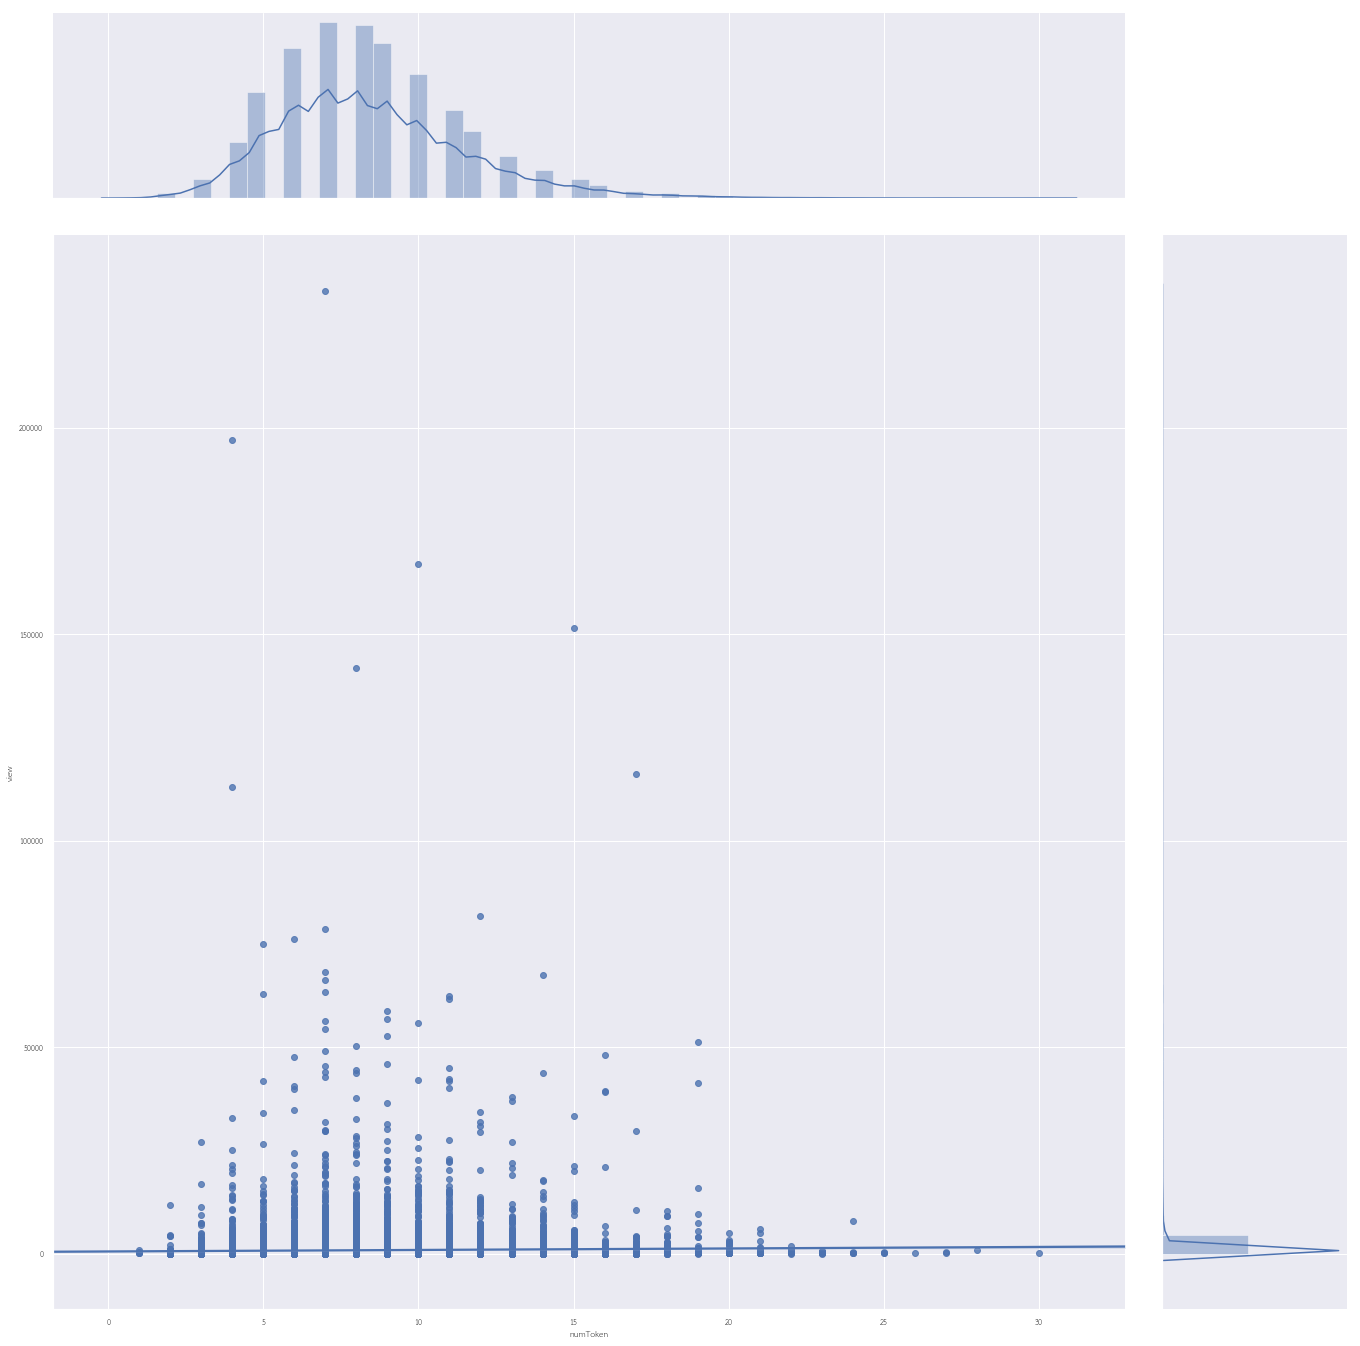

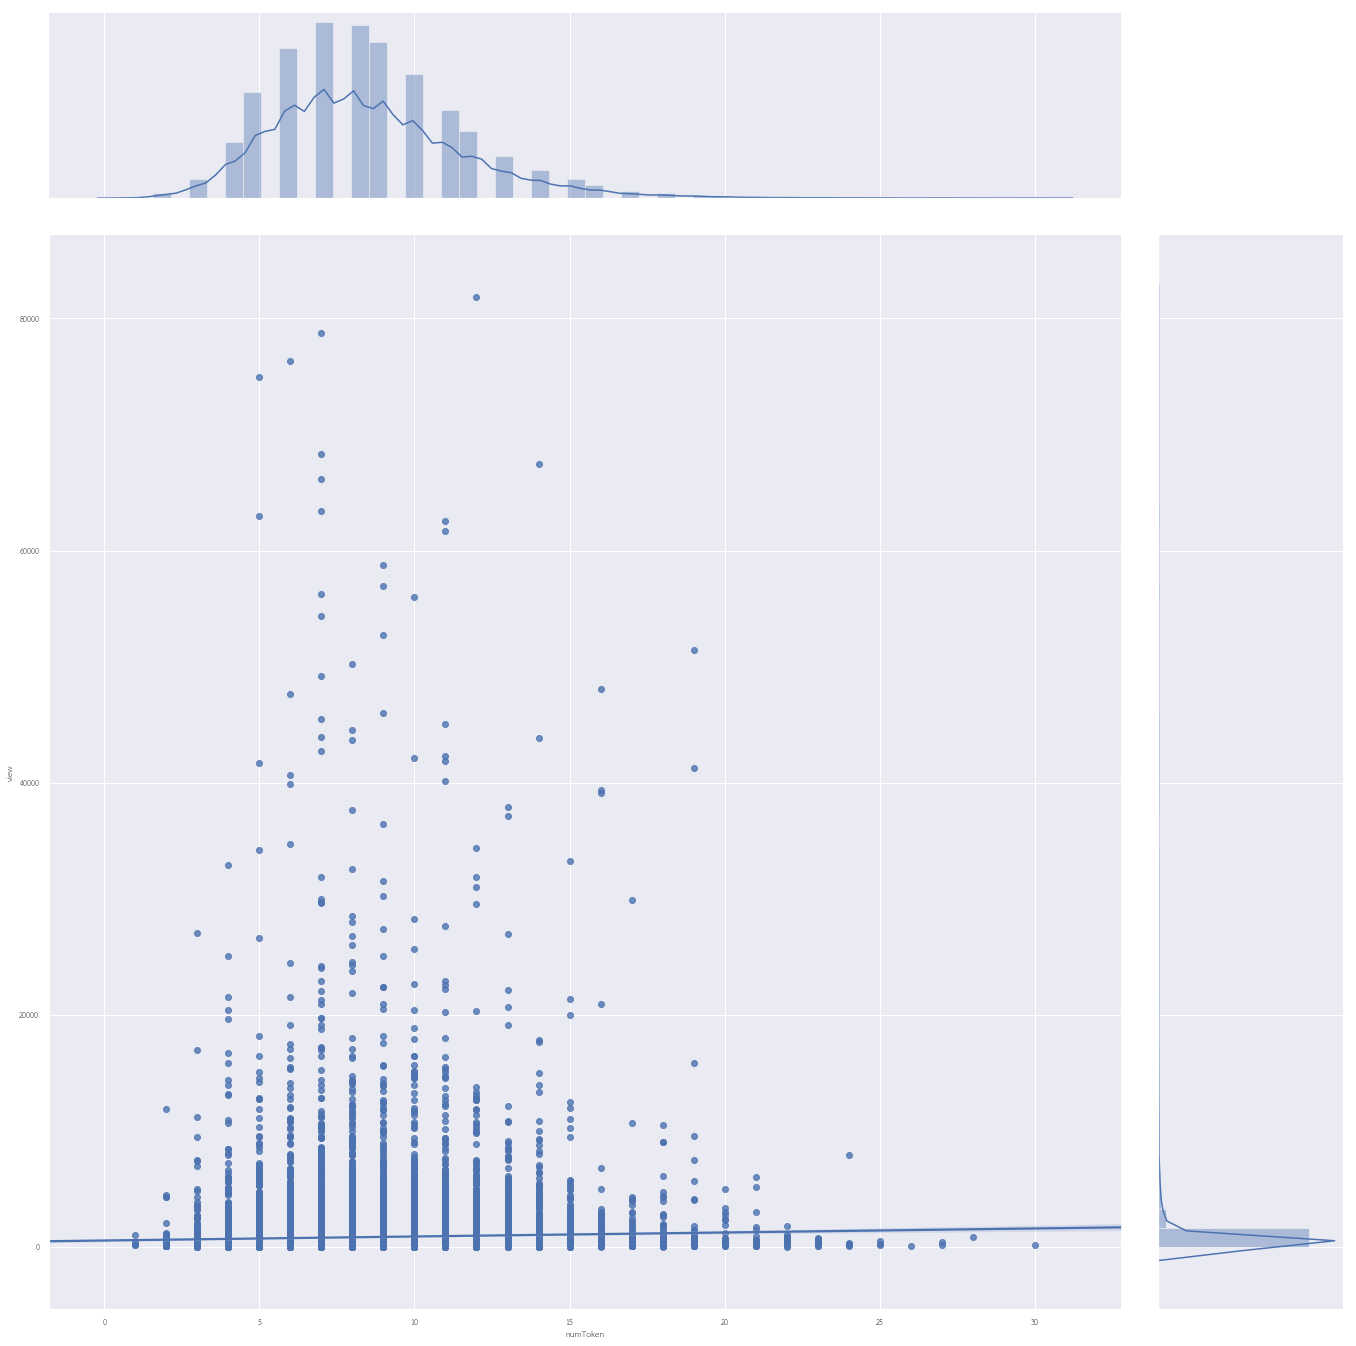

In [16]:
sns.jointplot("numToken", "view", data=input_ch3, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_ch3[input_ch3['view']<100000], kind="reg",height=20 )

In [17]:
IQRval = input_ch3['view'].describe().loc['75%']-input_ch3['view'].describe().loc['25%']

In [18]:
outlierMin = max(input_ch3['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_ch3['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 1157.0


In [61]:
input_ch3_cut = input_ch3[(input_ch3['view']<=outlierMax) & (input_ch3['view']>=outlierMin)]

In [62]:
input_ch3_cut['numToken'].describe()

count    21599.000000
mean         8.429881
std          3.039813
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         30.000000
Name: numToken, dtype: float64

In [63]:
input_ch3_cut['numChar'].describe()

count    21599.000000
mean        40.905783
std         13.199389
min          4.000000
25%         32.000000
50%         39.000000
75%         48.000000
max        134.000000
Name: numChar, dtype: float64

In [59]:
input_ch3_cut['view'].describe()

count    21599.000000
mean       302.969675
std        234.709191
min          5.000000
25%        136.000000
50%        225.000000
75%        393.500000
max       1157.000000
Name: view, dtype: float64

In [26]:
input_ch3_cut[input_ch3_cut['numToken']==22]

,Unnamed: 0,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken
1608,1608,คนร้ายดักยิงถล่มขบวนรถไฟเสียหายที่นราธิวาส-เจ้...,16/03/2562,SAT,12:08,286,ในประเทศ,"รถไฟ,คนร้าย",12,2,"['คน', 'ร้าย', 'ดัก', 'ยิง', 'ถล่ม', 'ขบวน', '...",22
3142,3142,ตร.แจงเหตุไปรับศพชายโดดสะพานช้า ทำกู้ภัยรอ 9 ช...,24/02/2562,SUN,12:58,409,ในประเทศ,"รับศพ,กู้ภัย,โดดสะพาน",12,3,"['ตร.', 'แจง', 'ศพ', 'ชาย', 'โดดสะพานช้า', 'ทำ...",22
9134,9134,เมืองทองเปิดตัว'โค้ชเบ๊'นั่งเก้าอี้กุนซือ ดึง'...,23/11/2561,FRI,10:14,25,กีฬา,"เมืองทอง,โค้ชเบ๊,มาริโอ ยูรอฟสกี้,แบงค็อก ยูไน...",10,5,"['เมืองทอง', 'ตัว', 'โค้ช', 'เบ๊', 'นั่ง', 'เก...",22
10313,10313,อุทาหรณ์!หนุ่มขาช้ำหลังเตะบอลไปนวดแผนไทย ช็อกเ...,03/11/2561,SAT,13:09,363,สังคมออนไลน์,"นวดแผนไทย,เสียชีวิต,ลิ่มเลือดอุดตัน",13,3,"['อุทาหรณ์', 'หนุ่ม', 'ขา', 'ช้ำ', 'เตะ', 'บอล...",22
11140,11140,คุณตาปวดหัวไปหาหมอถูกฉีดยาที่ง้ามนิ้ว สุดท้ายน...,20/10/2561,SAT,12:40,714,ในประเทศ,"ปวดหัว,ฉีดยา,นิ้วเน่า,ตัดนิ้ว,โรงพยาบาล",12,5,"['ตา', 'ปวด', 'หัว', 'หา', 'หมอ', 'ฉีด', 'ยา',...",22
12904,12904,กฟผ.เตรียมจัดแข่งขัน EGAT ยกน้ำหนักเยาวชนนานาช...,21/09/2561,FRI,14:42,117,กีฬา,"กฟผ.,กีฬายกน้ำหนัก",14,2,"['กฟผ.', 'เตรียม', 'แข่งขัน', 'EGAT', 'น้ำหนัก...",22
14382,14382,ป่วนอีก!หนุ่มค้างค่าส่วนกลาง ซิ่งชนไม้กั้นหน้า...,29/08/2561,WED,09:48,1045,ในประเทศ,"ซิ่งชนไม้กั้นหน้าป้อมยาม,ไม่จ่ายค่าส่วนกลาง,ลู...",9,5,"['ป่วน', 'หนุ่ม', 'ค้าง', 'ค่า', 'กลาง', 'ซิ่ง...",22
17874,17874,“เจมส์-จิรายุ” และ “แต้ว-ณฐพร” เชิญชวนแฟนละคร ...,04/07/2561,WED,13:13,950,บันเทิง,"เจมส์ จิรายุ,แต้ว ณฐพร,เกมเสน่หา",13,3,"['“', 'เจมส์-จิรายุ', '”', '“', 'แต้ว', 'ณฐพร'...",22
19681,19681,'เพชรดำ ไก่ย่างห้าดาว'ลั่นขอย้ำแค้น'รุ่งกิจ หม...,06/06/2561,WED,10:12,415,กีฬา,"ศึกมวยไทยราชดำเนิน,ศึกเพชรยินดี,ช่อง 28,เพชรดำ...",10,6,"['เพชรดำ', 'ไก่', 'ย่าง', 'ห้า', 'ดาว', 'ลั่น'...",22
21283,21283,“ไอซ์ – ภานุวัฒน์” นักแสดงดาวรุ่งดวงใหม่ นำทัพ...,12/05/2561,SAT,10:52,985,บันเทิง,"ไอซ์ ภานุวัฒน์,SOCIAL DEATH VOTE,TeenTime28,ซี...",10,6,"['“', 'ไอซ์', '–', 'ภานุวัฒน์', '”', 'ดาว', 'ร...",22


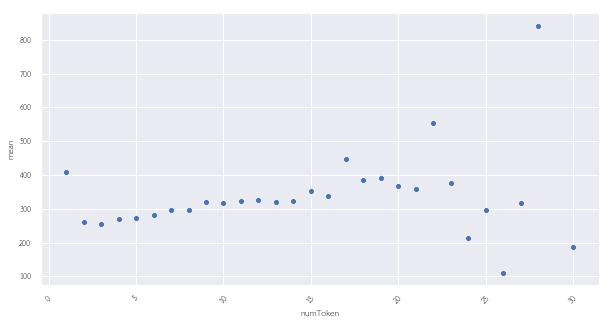

In [21]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['numToken'])['view'].describe()).reset_index())

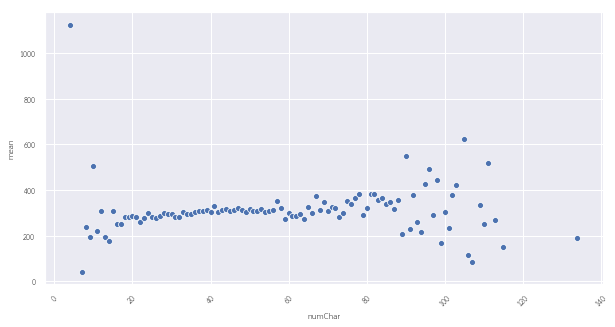

In [64]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(
    input_ch3_cut.groupby(['numChar'])['view'].describe()).reset_index())

## Include stop words

In [27]:
input_ch3 = pd.read_csv('notebook1-result-ch3.csv')

In [28]:
input_ch3.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
from stop_words import get_stop_words
num = [str(i) for i in range(1000)]
stop_words =[' ']
stop_words+=string.punctuation

In [30]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in num and i not in stop_words]
    return res

In [31]:
input_ch3['token'] = input_ch3['headline'].apply(getToken)

In [66]:
input_ch3['token'] = input_ch3['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [67]:
# input_ch3.to_csv('Ch3-tokenize_include_stop.csv')

In [68]:
input_ch3 = pd.read_csv('Ch3-tokenize_include_stop.csv')

In [69]:
input_ch3['numToken'] = input_ch3['token'].apply(lambda x : len(x.split(',')))

In [70]:
input_ch3['numChar'] = input_ch3['token'].apply(lambda x: len(x.replace(',','')))

In [71]:
input_ch3.head()

,Unnamed: 0,Unnamed: 0.1,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar
0,0,0,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",05/04/2562,FRI,19:01,143,ในประเทศ,"น้องภาคิน,เด็กหาย,เพชรบุรี",19,3,"เจ้าหน้าที่,ยัง,ตาม,หา,น้องภาคิน,หาย,ตัว,จาก,บ้าน",9,41
1,1,1,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ ...",05/04/2562,FRI,18:50,108,กีฬา,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก ...",18,4,"รัชนก,พ่าย,ไท่,ซื่อ,หยิง,มือ,โลก,ร่วง,ตกรอบ,คน...",12,54
2,2,2,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทา...,05/04/2562,FRI,18:38,205,กีฬา,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทา...",18,3,"“,สราวุฒิ,”,สุด,เจ๋ง,ผงาด,คว้า,แชมป์,สเตจ,จักร...",15,62
3,3,3,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",05/04/2562,FRI,18:25,73,บันเทิง,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร",18,2,"แบงค์ฮอร์โมน,ขอ,ผ่อนผัน,การ,เกณฑ์,ทหาร",6,33
4,4,4,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,05/04/2562,FRI,18:06,18,กีฬา,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรี...",18,4,"สนาม,ฟุตบอล,จาก,ขยะ,รีไซเคิล,ช่วง,บอล,โลก,2018",9,38


In [36]:
IQRval = input_ch3['view'].describe().loc['75%']-input_ch3['view'].describe().loc['25%']

In [37]:
outlierMin = max(input_ch3['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_ch3['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 1157.0


In [74]:
input_ch3_cut = input_ch3[(input_ch3['view']<=outlierMax) & (input_ch3['view']>=outlierMin)]

In [50]:
input_ch3_cut['numToken'].describe()

count    21599.000000
mean        11.149127
std          3.968523
min          1.000000
25%          8.000000
50%         11.000000
75%         13.000000
max         37.000000
Name: numToken, dtype: float64

In [75]:
input_ch3_cut['numChar'].describe()

count    21599.000000
mean        49.822260
std         15.435156
min          8.000000
25%         39.000000
50%         47.000000
75%         58.000000
max        147.000000
Name: numChar, dtype: float64

In [51]:
input_ch3_cut['view'].describe()

count    21599.000000
mean       302.969675
std        234.709191
min          5.000000
25%        136.000000
50%        225.000000
75%        393.500000
max       1157.000000
Name: view, dtype: float64

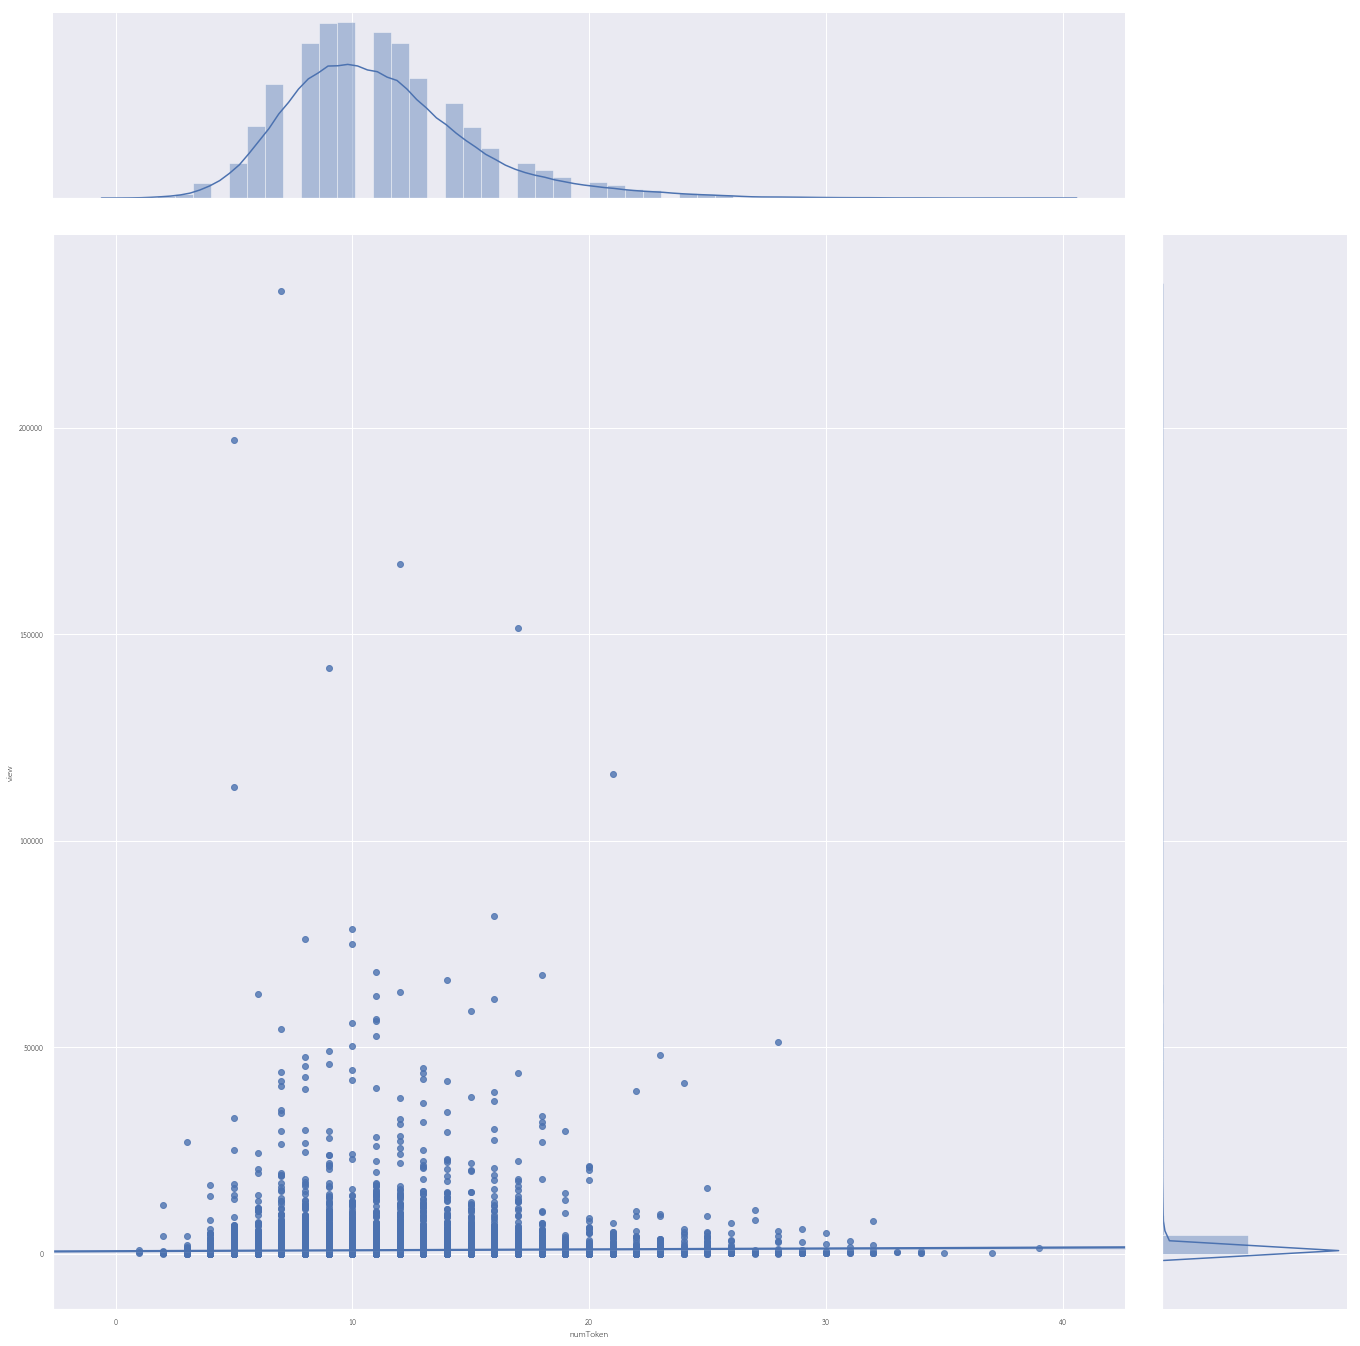

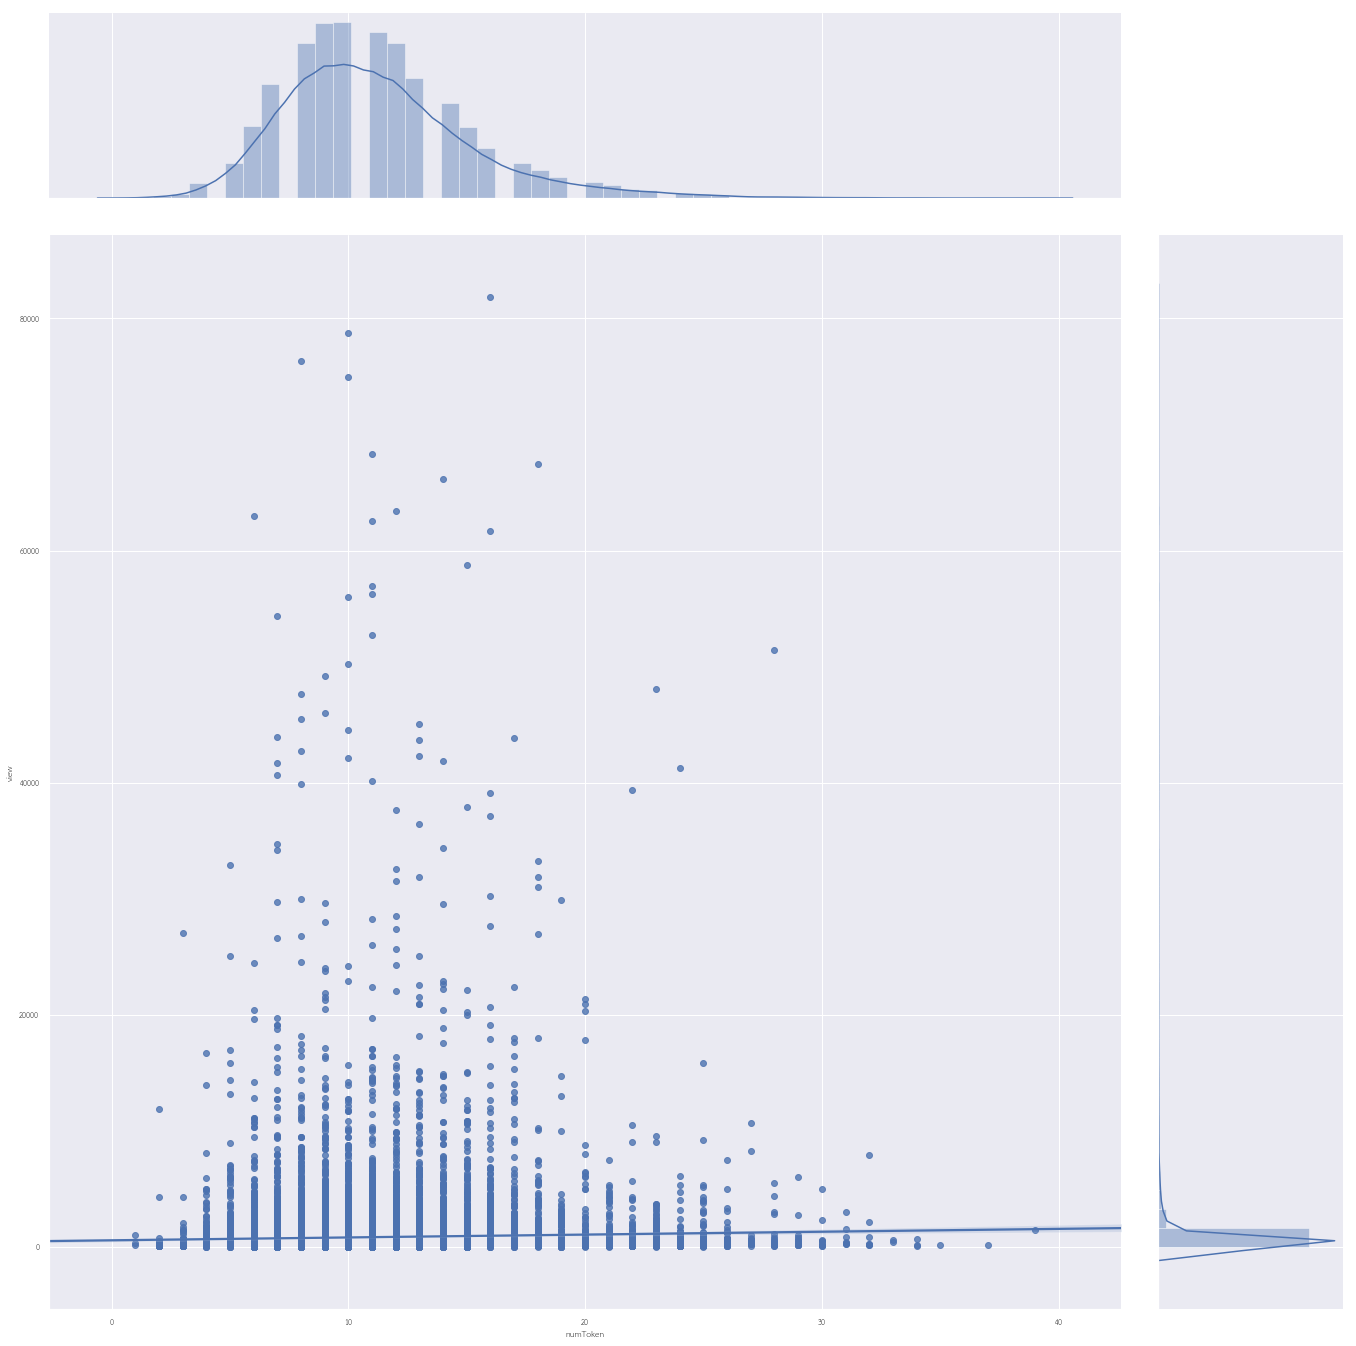

In [42]:
sns.jointplot("numToken", "view", data=input_ch3, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_ch3[input_ch3['view']<100000], kind="reg",height=20 )

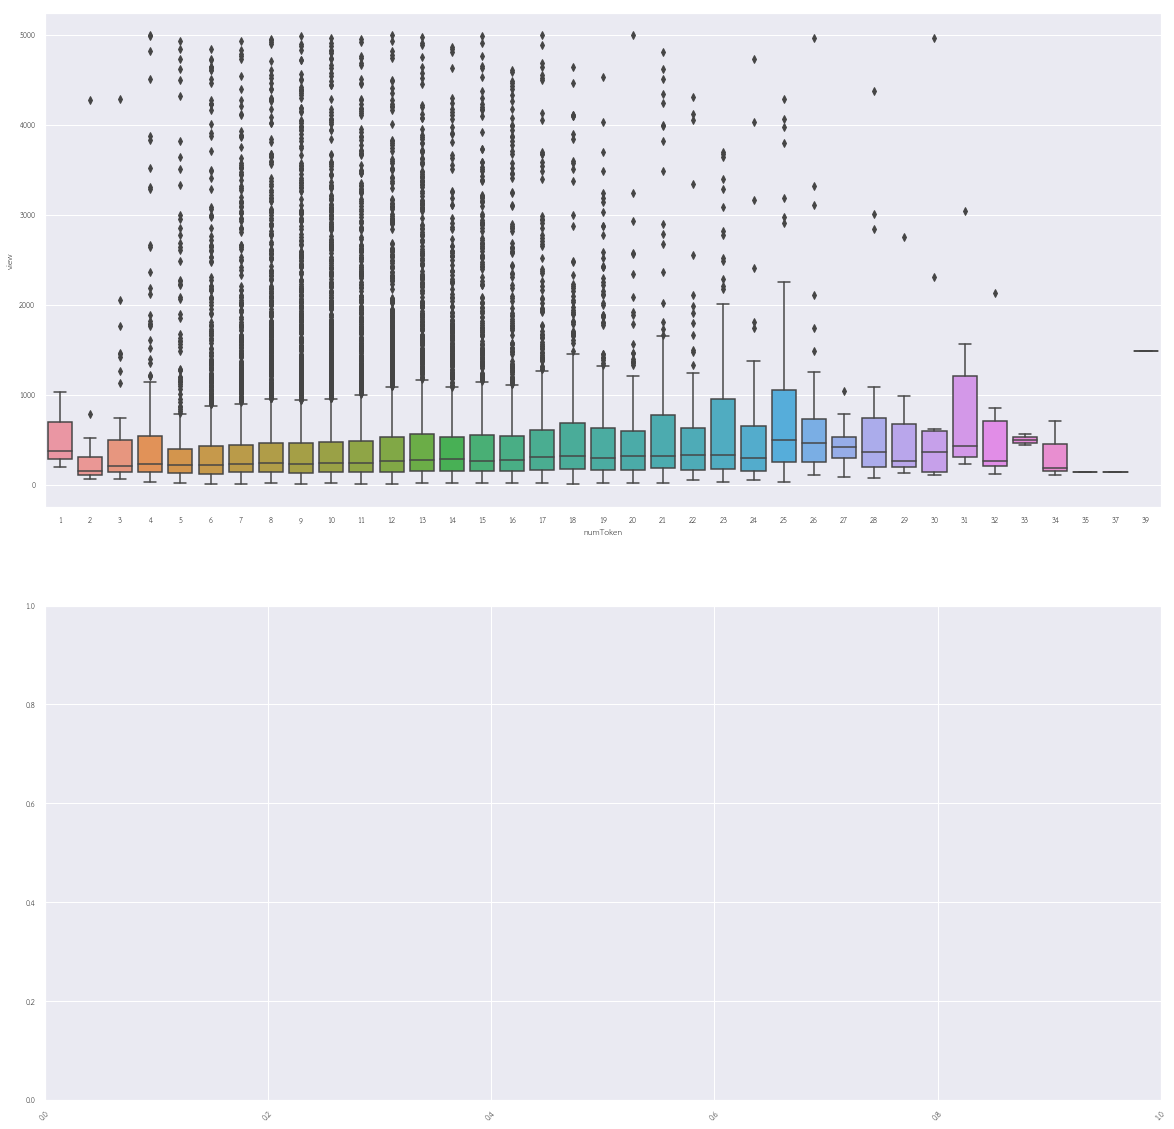

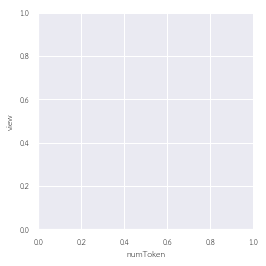

In [49]:
fig , ax = plt.subplots(2,1,figsize=(20,20))
plt.xticks(rotation=45)
sns.catplot( ax=ax[0], x="numToken", y="view",kind="box",data=input_ch3[input_ch3['view']<5000])

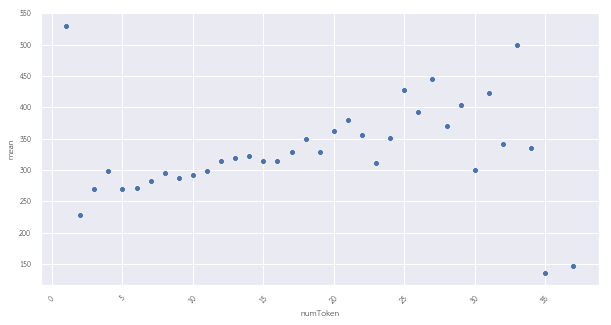

In [40]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['numToken'])['view'].describe()).reset_index())

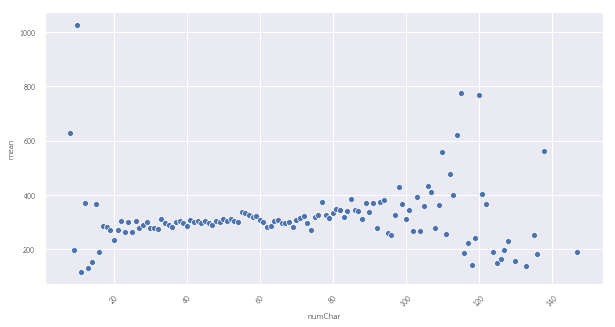

In [76]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['numChar'])['view'].describe()).reset_index())